<a href="https://colab.research.google.com/github/Vinoth11111/Messy-Data-Cleaning/blob/main/Handling_missing_values_in_monsoon_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df = pd.read_csv('/content/Sub_Division_IMD_2017.csv')

In [3]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
# checking the dimension of the data
df.shape

(4188, 19)

In [5]:
# checking the data type of the features some times nan values are rep as '?'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

In [6]:
# basic statistical report
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [7]:
#finding the missing values
df.isna().sum()

,0
SUBDIVISION,0
YEAR,0
JAN,4
FEB,3
MAR,6
APR,4
MAY,3
JUN,5
JUL,7
AUG,4


In [8]:
# getting numerical columns only
num_data = df.select_dtypes(include='float64')
print(num_data)

       JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0     49.2   87.1   29.2    2.3  528.8  517.5  365.1  481.1  332.6  388.5   
1      0.0  159.8   12.2    0.0  446.1  537.1  228.9  753.7  666.2  197.2   
2     12.7  144.0    0.0    1.0  235.1  479.9  728.4  326.7  339.0  181.2   
3      9.4   14.7    0.0  202.4  304.5  495.1  502.0  160.1  820.4  222.2   
4      1.3    0.0    3.3   26.9  279.5  628.7  368.7  330.5  297.0  260.7   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
4183  26.2   34.4   37.5    5.3   88.3  426.2  296.4  154.4  180.0   72.8   
4184  53.2   16.1    4.4   14.9   57.4  244.1  116.1  466.1  132.2  169.2   
4185   2.2    0.5    3.7   87.1  133.1  296.6  257.5  146.4  160.4  165.4   
4186  59.6   12.1    3.2    2.6   77.4  321.1  262.6   86.2   75.6   58.6   
4187  21.3    0.9  100.2    1.8  145.7  521.9  164.2  206.2  216.0  137.1   

        NOV    DEC  ANNUAL     JF    MAM    JJAS    OND  
0     558.2   33.

In [9]:
# checking for numerical missing values,which we usualy rep as None or -999
def check(num_data):
  null_val = [-999,None]
  for i in num_data.columns:
    if df[i].isin(null_val).any():
      print(f'failed{i}')
    else:
      print(f'passed {i}')

In [10]:
print(check(num_data))

passed JAN
passed FEB
passed MAR
passed APR
passed MAY
passed JUN
passed JUL
passed AUG
passed SEP
passed OCT
passed NOV
passed DEC
passed ANNUAL
passed JF
passed MAM
passed JJAS
passed OND
None


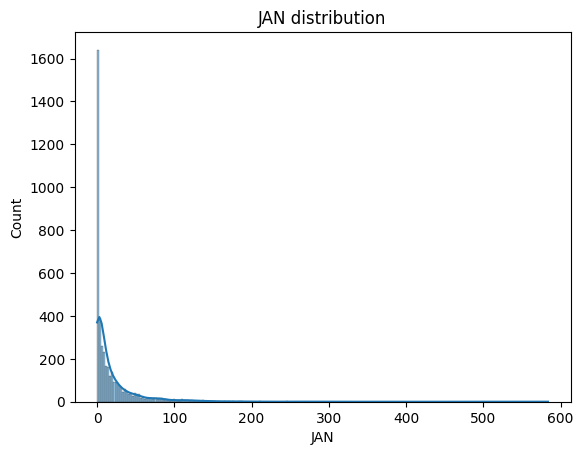

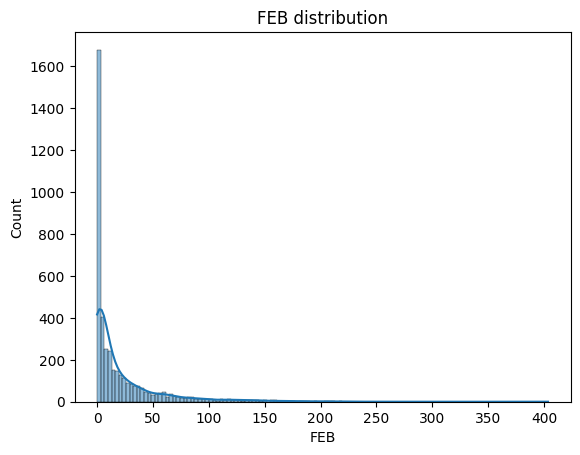

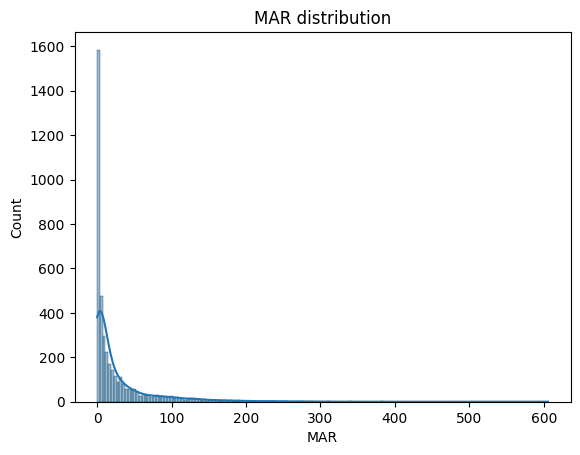

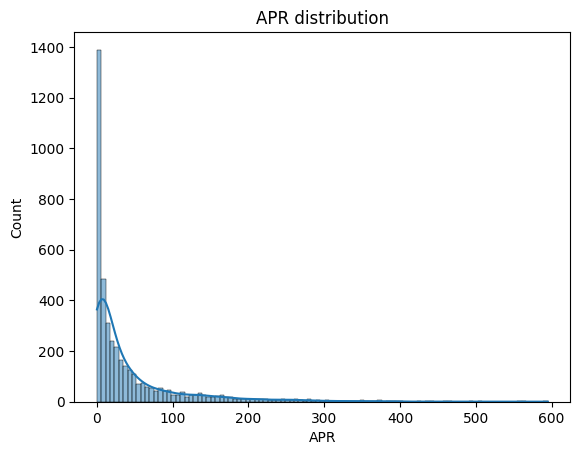

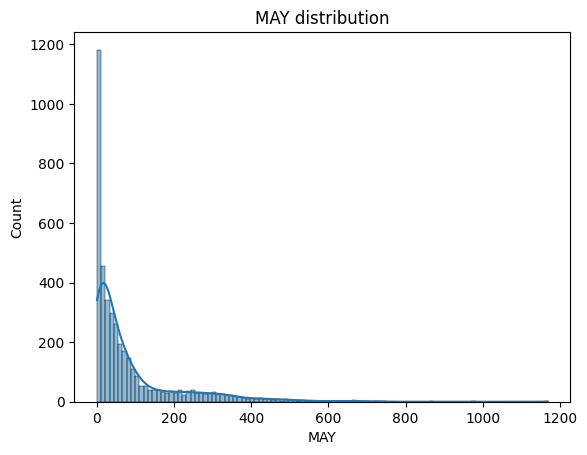

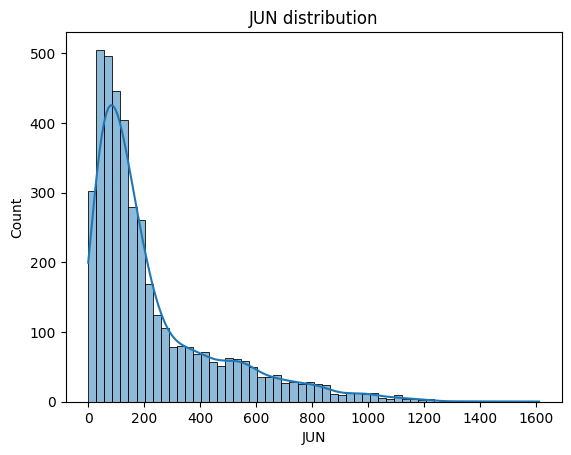

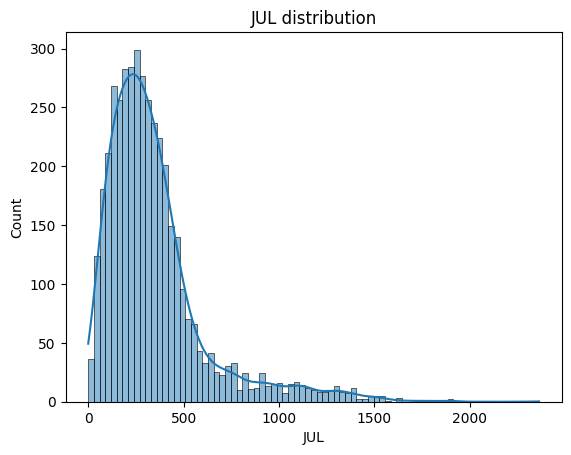

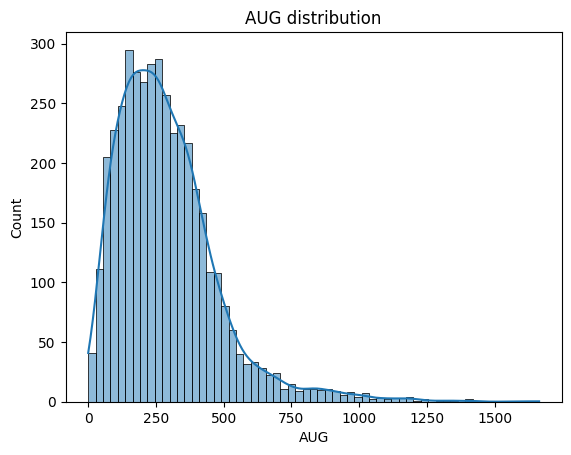

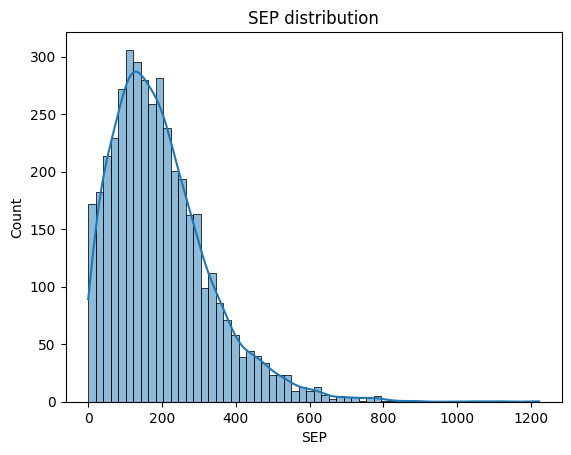

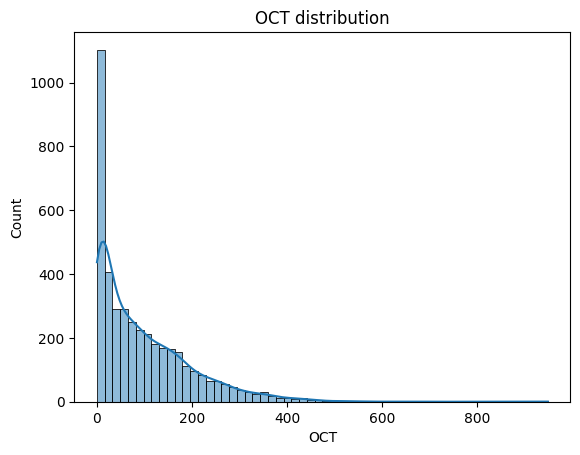

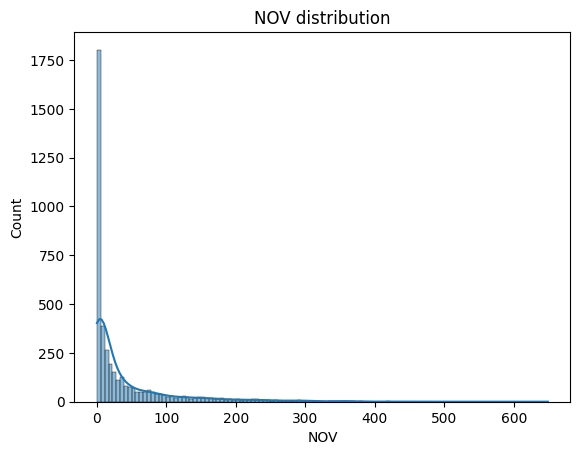

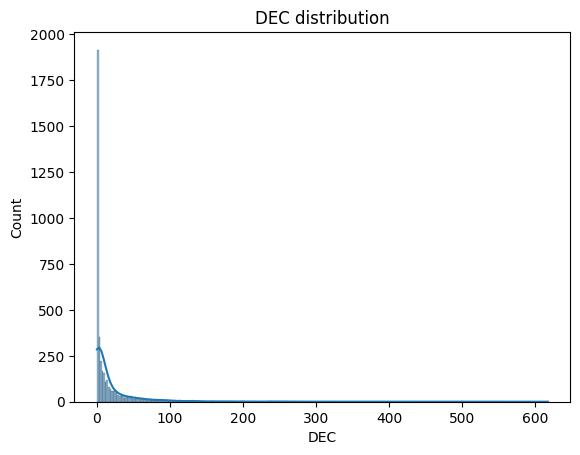

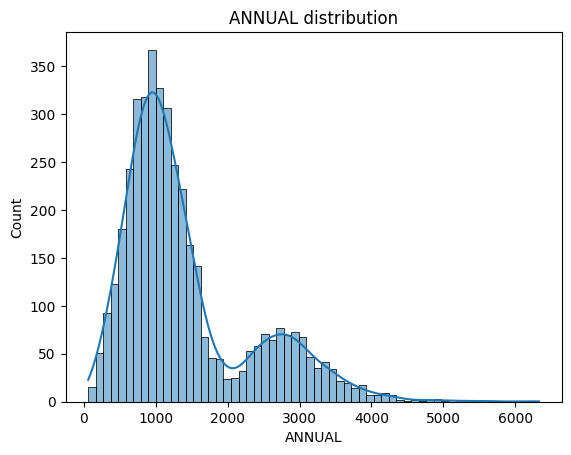

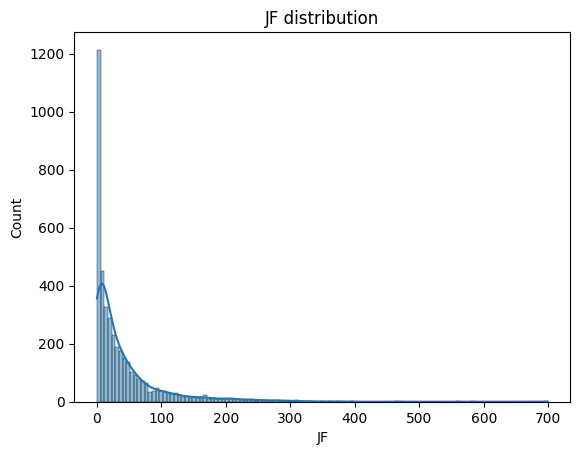

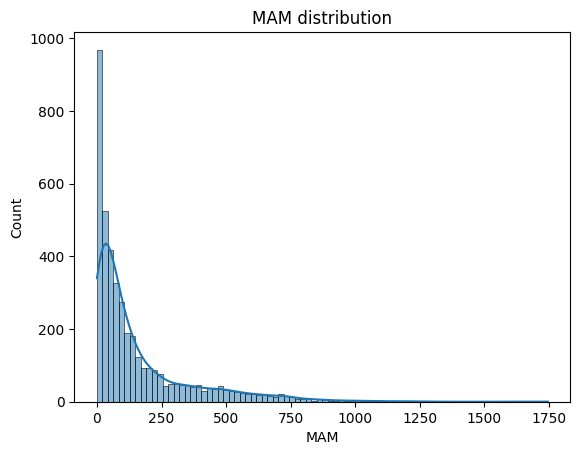

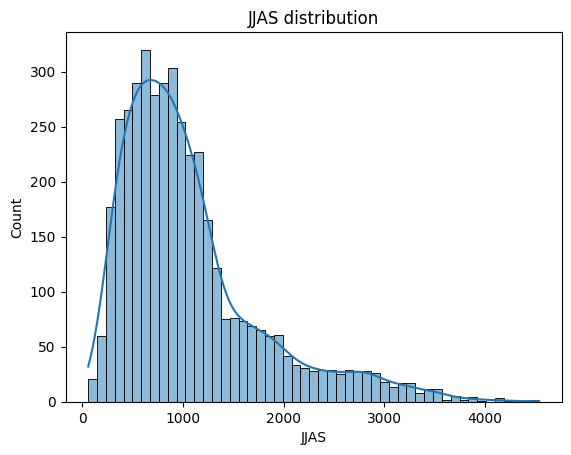

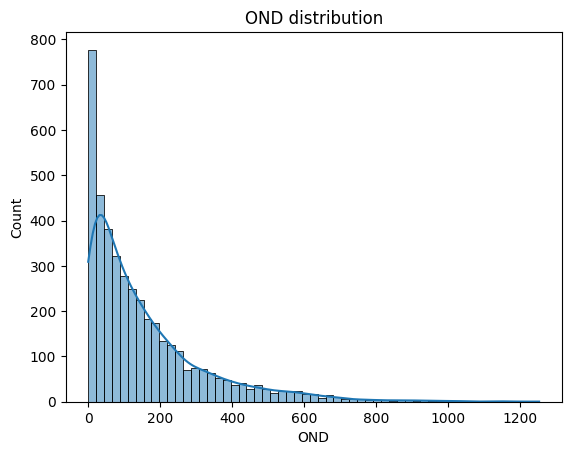

In [11]:
#checking the distribution of the data, for not disordering the distribution after missing value handling
for i in num_data.columns:
  sns.histplot(df[i],kde= True)
  plt.title(f'{i} distribution')
  plt.show()

In [12]:
# ckecking the std and mean before handling missing values.
num_std = []
num_mean = []
for i in num_data.columns:
  num_std.append(df[i].std())
  num_mean.append(df[i].mean())

In [13]:
num_std

[33.793127908812735,
 35.731734421874364,
 46.927962632166974,
 68.15098508952119,
 122.69513749937448,
 234.29208676509268,
 268.8507022148791,
 188.42607121562068,
 135.5476458986496,
 99.1948509691692,
 68.3587062454526,
 43.05375895934883,
 902.5994206010254,
 59.29390395784498,
 201.1986273742396,
 706.6660446612517,
 166.8631713312235]

In [14]:
# coping the dataframe for avoid changing in the original data
mean_df = df.copy()

In [15]:
# handling missing value using mean.
for i in num_data.columns:
  mean_df.fillna(mean_df[i].mean(),inplace=True)

In [16]:
df.isnull().sum()

,0
SUBDIVISION,0
YEAR,0
JAN,4
FEB,3
MAR,6
APR,4
MAY,3
JUN,5
JUL,7
AUG,4


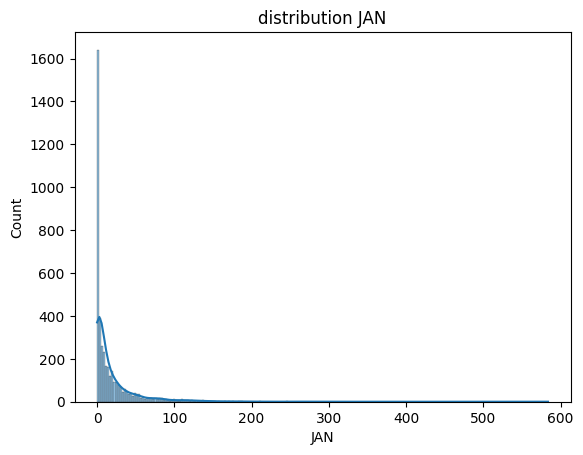

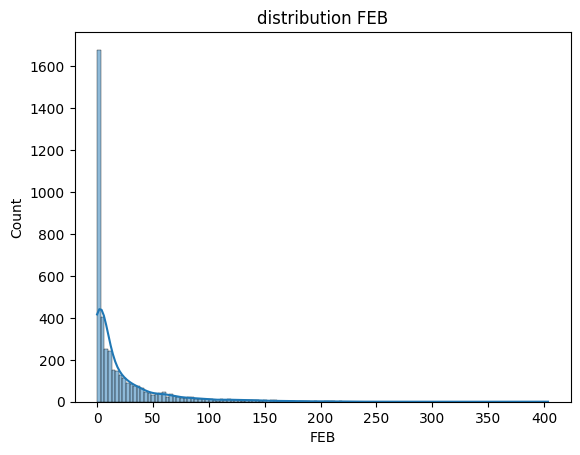

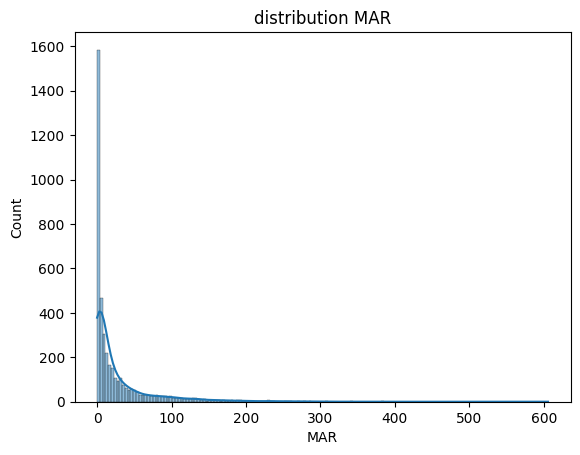

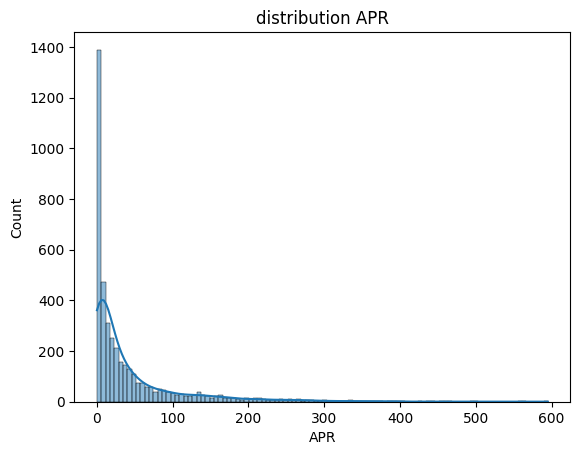

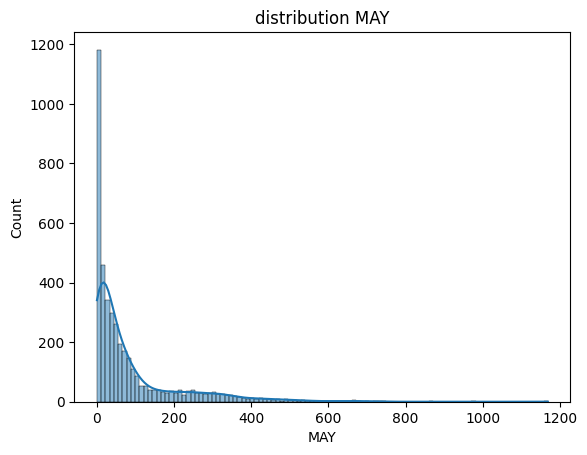

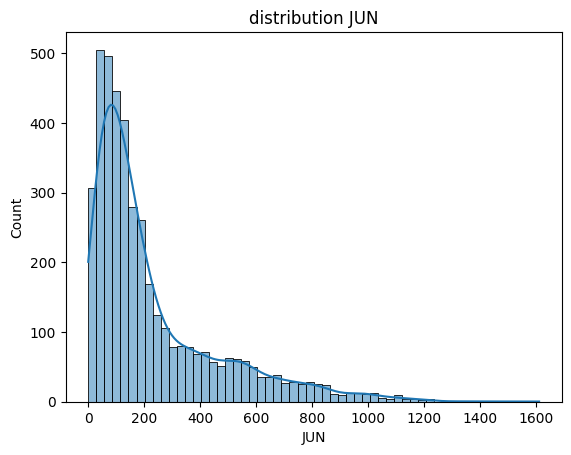

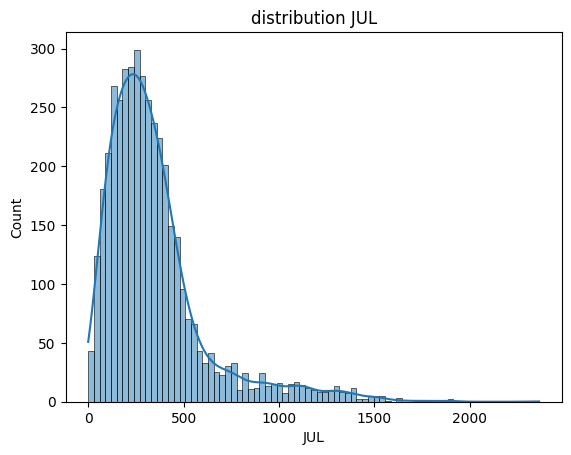

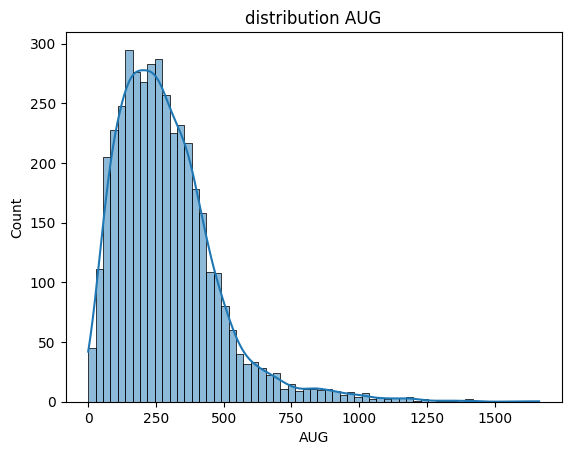

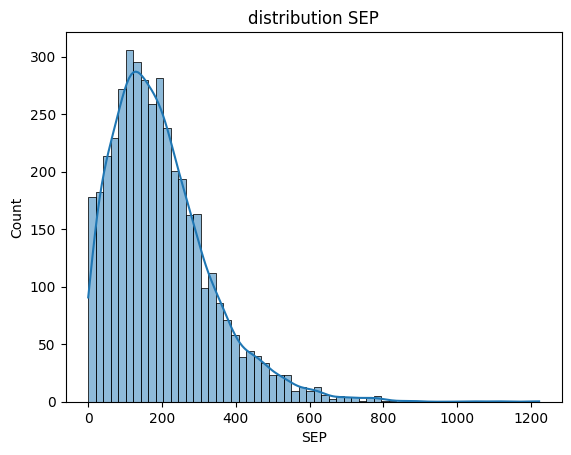

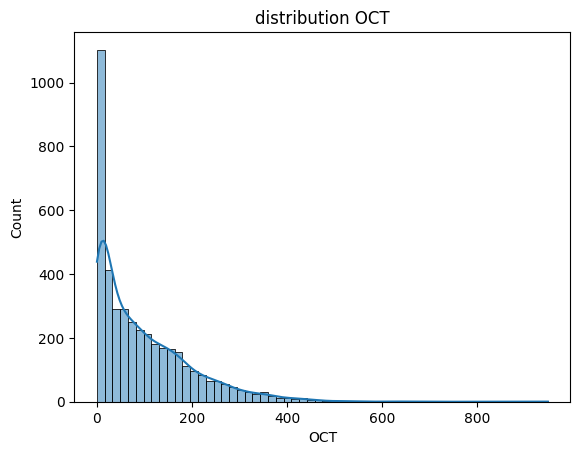

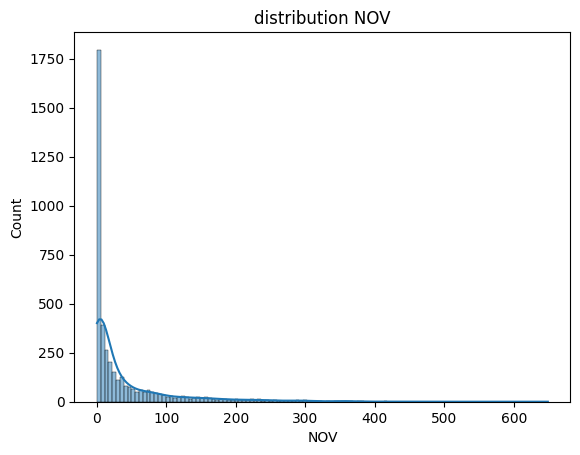

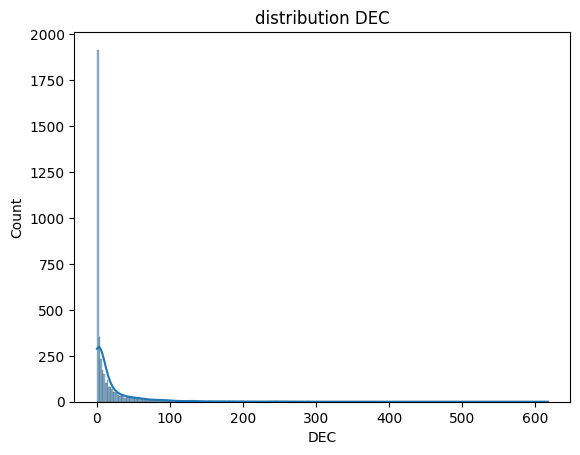

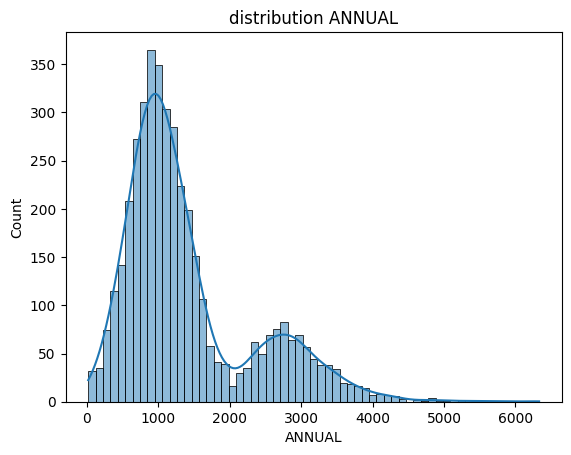

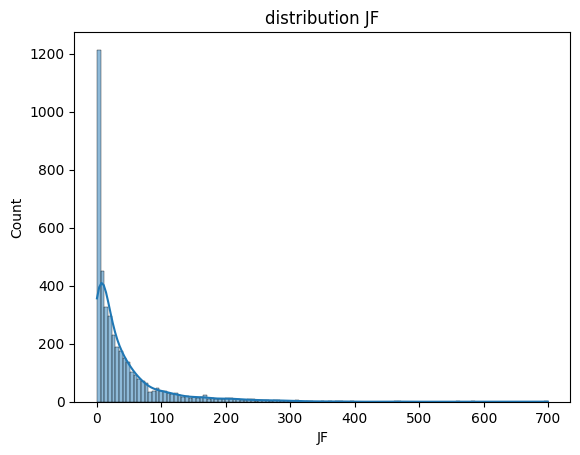

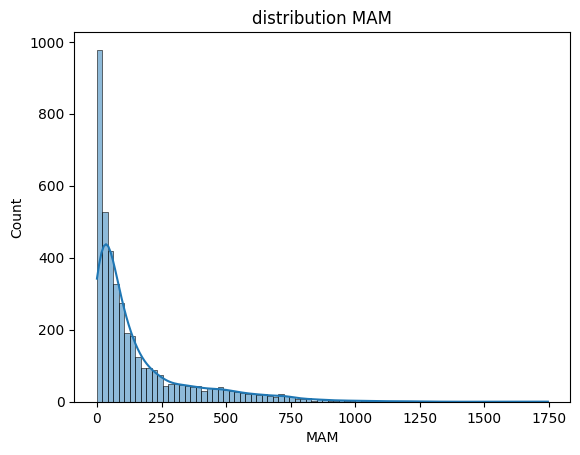

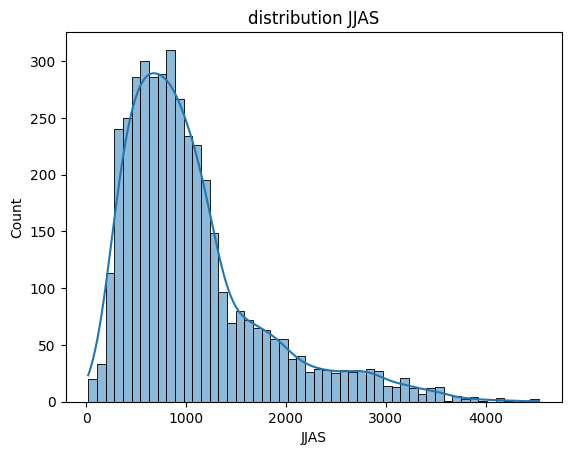

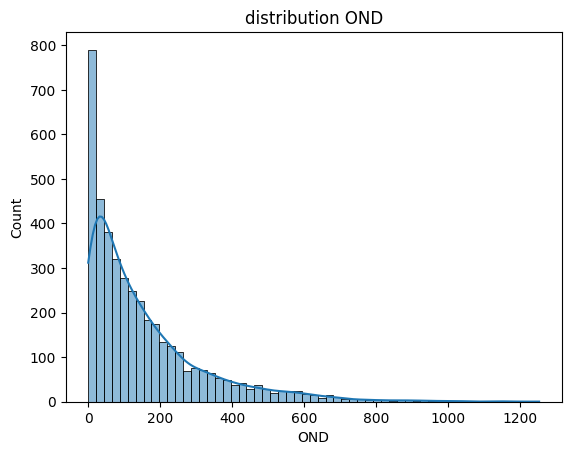

In [48]:
# checking the distribution after handling the missing values.
for i in num_data.columns:
  sns.histplot(mean_df[i],kde= True)
  plt.title(f'distribution {i}')
  plt.xlabel(i)
  plt.show()

In [18]:
# finding the std and mean after handling the msssing values
new_std = []
new_mean = []
for i in num_data.columns:
  new_std.append(mean_df[i].std())
  new_mean.append(mean_df[i].mean())

In [19]:
for old,new in zip(num_std,new_std):
  print(f'std before handling NAN -->{old:.4f},std after handling NAN -->{new:.4f}')

std before handling NAN -->33.7931,std after handling NAN -->33.7770
std before handling NAN -->35.7317,std after handling NAN -->35.7190
std before handling NAN -->46.9280,std after handling NAN -->46.8954
std before handling NAN -->68.1510,std after handling NAN -->68.1225
std before handling NAN -->122.6951,std after handling NAN -->122.6642
std before handling NAN -->234.2921,std after handling NAN -->234.2657
std before handling NAN -->268.8507,std after handling NAN -->268.9601
std before handling NAN -->188.4261,std after handling NAN -->188.5218
std before handling NAN -->135.5476,std after handling NAN -->135.6185
std before handling NAN -->99.1949,std after handling NAN -->99.1610
std before handling NAN -->68.3587,std after handling NAN -->68.2770
std before handling NAN -->43.0538,std after handling NAN -->43.0023
std before handling NAN -->902.5994,std after handling NAN -->906.3988
std before handling NAN -->59.2939,std after handling NAN -->59.2570
std before handling NA

In [20]:
for old,new in zip(num_mean,new_mean):
  print(f'mean before handling NAN -->{old:.4f},mean after handling NAN -->{new:.4f}')

mean before handling NAN -->18.9383,mean after handling NAN -->18.9383
mean before handling NAN -->21.5994,mean after handling NAN -->21.5975
mean before handling NAN -->27.4129,mean after handling NAN -->27.4008
mean before handling NAN -->43.0718,mean after handling NAN -->43.0488
mean before handling NAN -->85.6609,mean after handling NAN -->85.6131
mean before handling NAN -->230.1175,mean after handling NAN -->229.8654
mean before handling NAN -->347.0200,mean after handling NAN -->346.4717
mean before handling NAN -->289.7422,mean after handling NAN -->289.4835
mean before handling NAN -->197.3163,mean after handling NAN -->197.0608
mean before handling NAN -->95.3247,mean after handling NAN -->95.1970
mean before handling NAN -->39.4964,mean after handling NAN -->39.4424
mean before handling NAN -->18.9686,mean after handling NAN -->18.9686
mean before handling NAN -->1409.4492,mean after handling NAN -->1400.8166
mean before handling NAN -->40.5230,mean after handling NAN -->40

Since the missing values were very small the distribution is not diordered very much. we can also drop the mssing value we need.

In [21]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

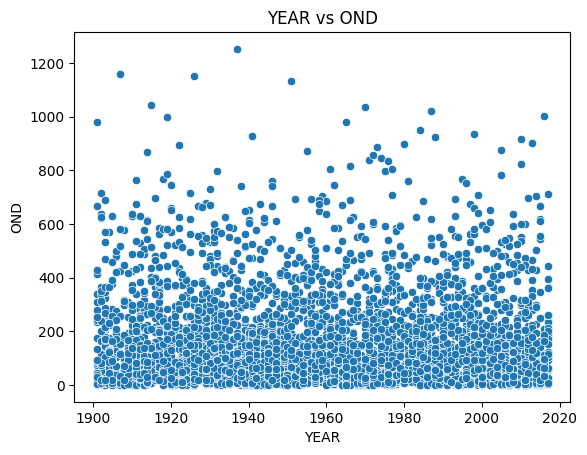

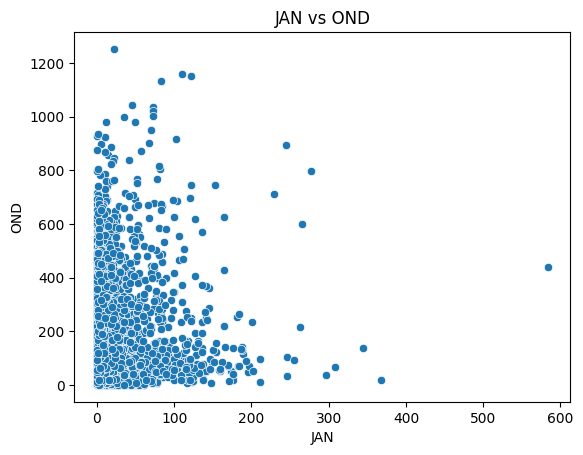

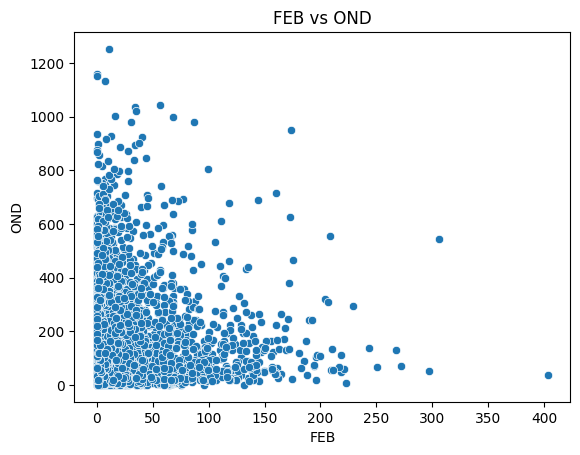

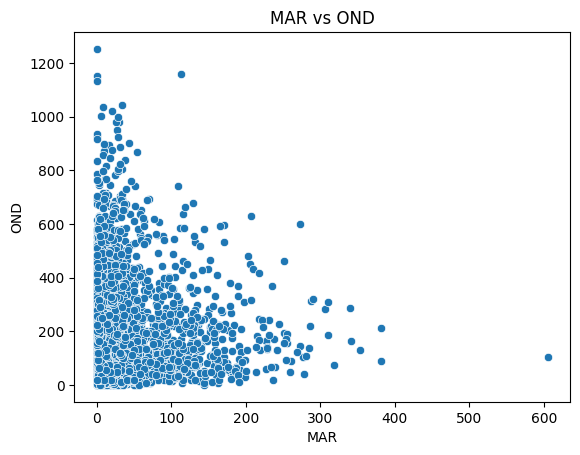

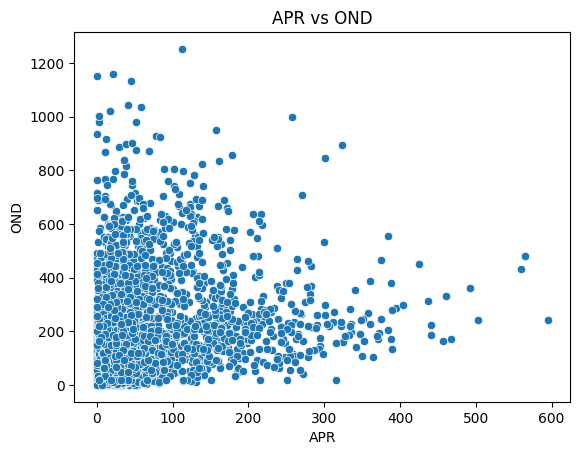

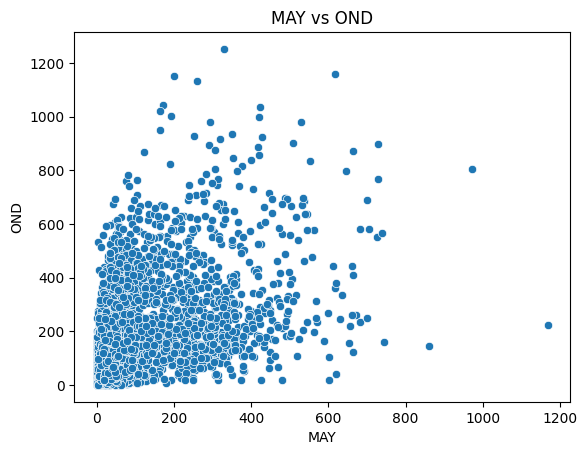

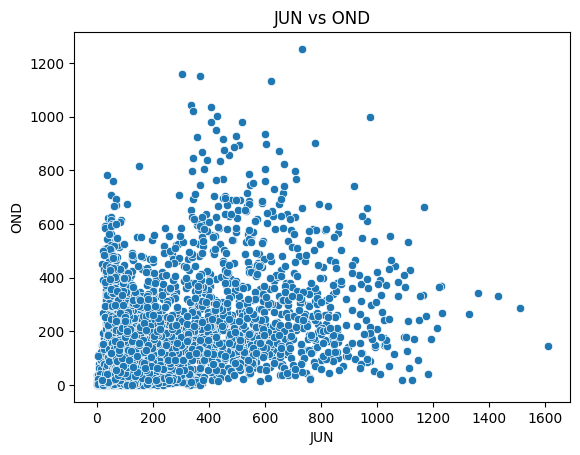

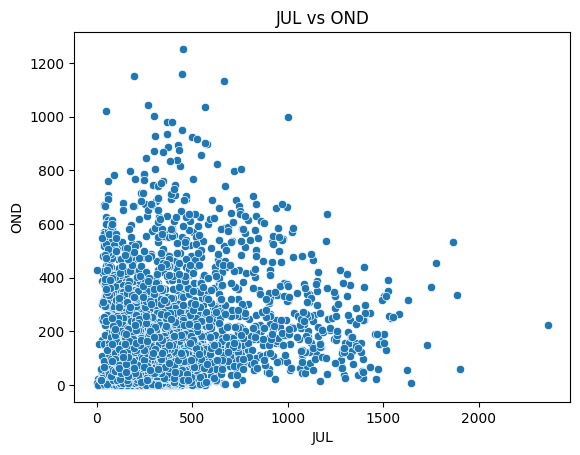

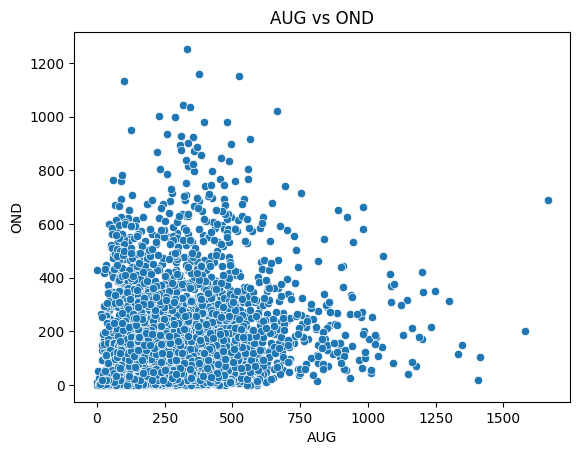

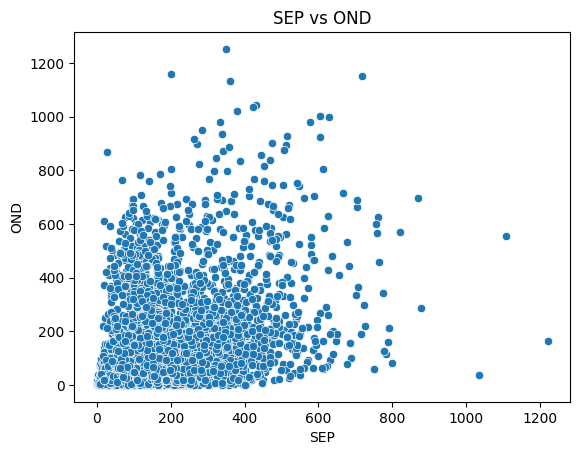

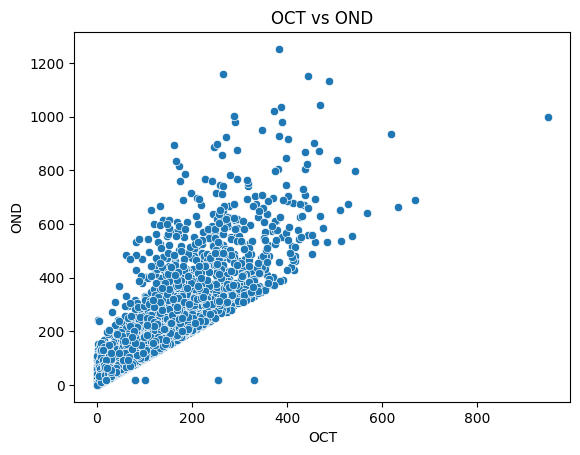

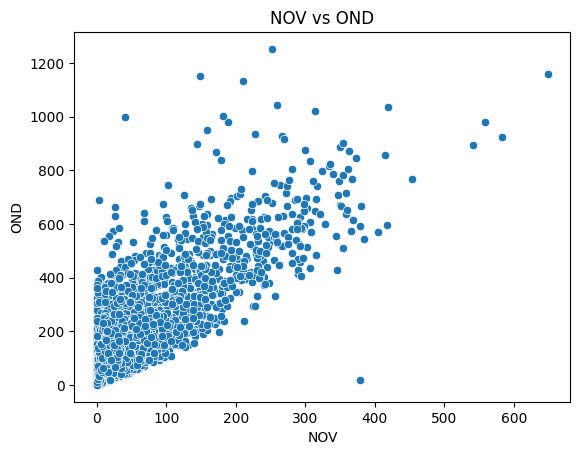

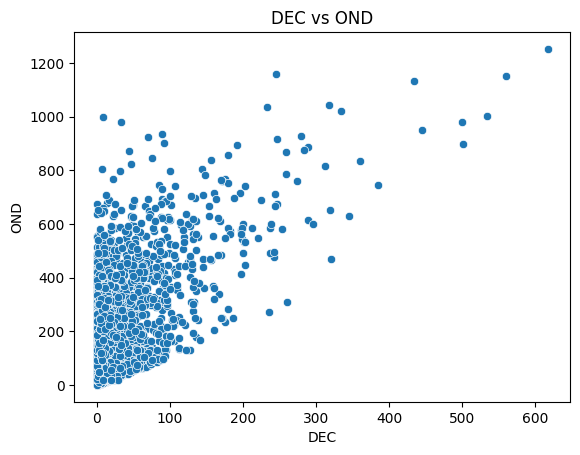

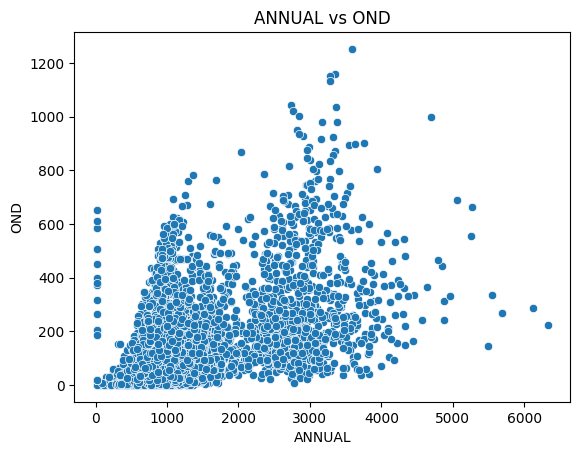

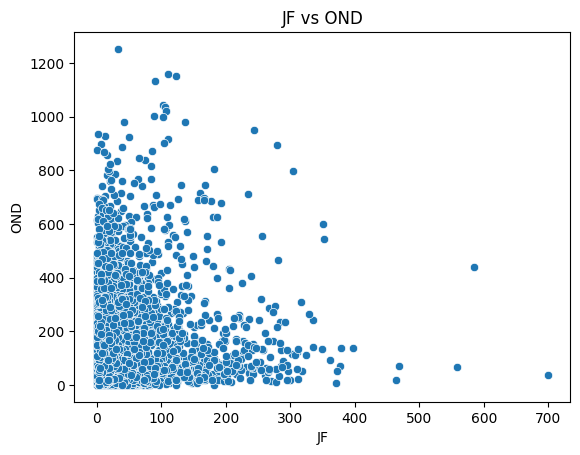

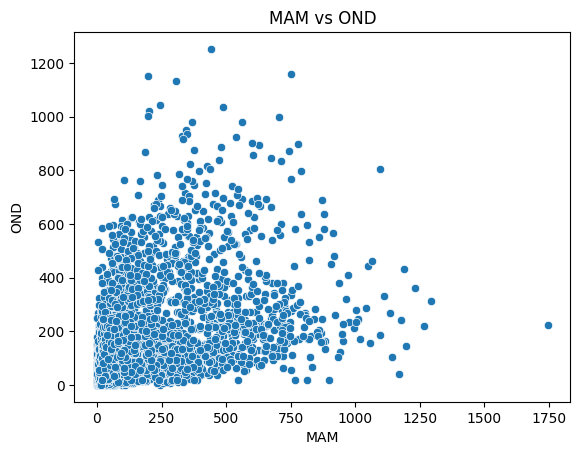

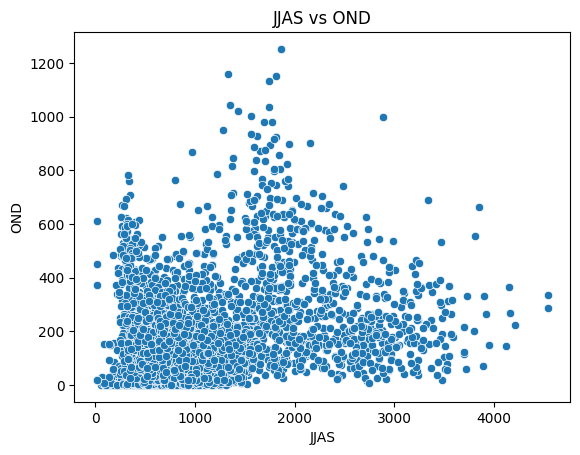

In [22]:
# checking the relationship of independant variable to the dependent variable.
x = mean_df.drop(columns = ['SUBDIVISION','OND'])
y = mean_df['OND']
for i in x.columns:
  sns.scatterplot(x=x[i],y=y)
  plt.title(f'{i} vs OND')
  plt.xlabel(i)
  plt.ylabel('OND')
  plt.show()

In [23]:
corr = mean_df.corr(numeric_only=True)
corr

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
YEAR,1.000000,-0.054854,-0.031282,0.021825,0.006589,0.002588,-0.013285,-0.015847,0.002574,-0.005602,0.000252,-0.026883,-0.014301,-0.005745,-0.049460,0.010678,-0.009228,-0.012846
JAN,-0.054854,1.000000,0.454058,0.393261,0.208949,0.129741,-0.032976,-0.054098,0.011028,0.023937,0.012023,0.071068,0.228020,0.099160,0.843077,0.240131,-0.025620,0.094120
FEB,-0.031282,0.454058,1.000000,0.577584,0.368388,0.203922,0.033659,0.015382,0.072816,0.079439,-0.004080,-0.021940,0.128993,0.173269,0.861287,0.381994,0.048565,0.021032
MAR,0.021825,0.393261,0.577584,1.000000,0.558688,0.364283,0.165033,0.096021,0.136039,0.179379,0.087990,0.009056,0.132701,0.316500,0.572334,0.644492,0.159450,0.090187
APR,0.006589,0.208949,0.368388,0.558688,1.000000,0.650170,0.450168,0.263857,0.255317,0.380962,0.366896,0.162728,0.127555,0.557230,0.340958,0.861784,0.384865,0.315402
MAY,0.002588,0.129741,0.203922,0.364283,0.650170,1.000000,0.564948,0.328334,0.327458,0.490069,0.527153,0.349895,0.247940,0.676538,0.196489,0.911336,0.489616,0.517099
JUN,-0.013285,-0.032976,0.033659,0.165033,0.450168,0.564948,1.000000,0.738532,0.655073,0.551931,0.488450,0.228500,0.090660,0.870756,0.001114,0.531606,0.887798,0.405672
JUL,-0.015847,-0.054098,0.015382,0.096021,0.263857,0.328334,0.738532,1.000000,0.686667,0.513983,0.299539,0.042244,-0.020740,0.801241,-0.021281,0.307759,0.907034,0.189219
AUG,0.002574,0.011028,0.072816,0.136039,0.255317,0.327458,0.655073,0.686667,1.000000,0.498395,0.253197,0.018897,0.000909,0.745959,0.050595,0.316222,0.839008,0.156869
SEP,-0.005602,0.023937,0.079439,0.179379,0.380962,0.490069,0.551931,0.513983,0.498395,1.000000,0.386384,0.154855,0.113926,0.707393,0.061532,0.466029,0.702770,0.322120


<Axes: >

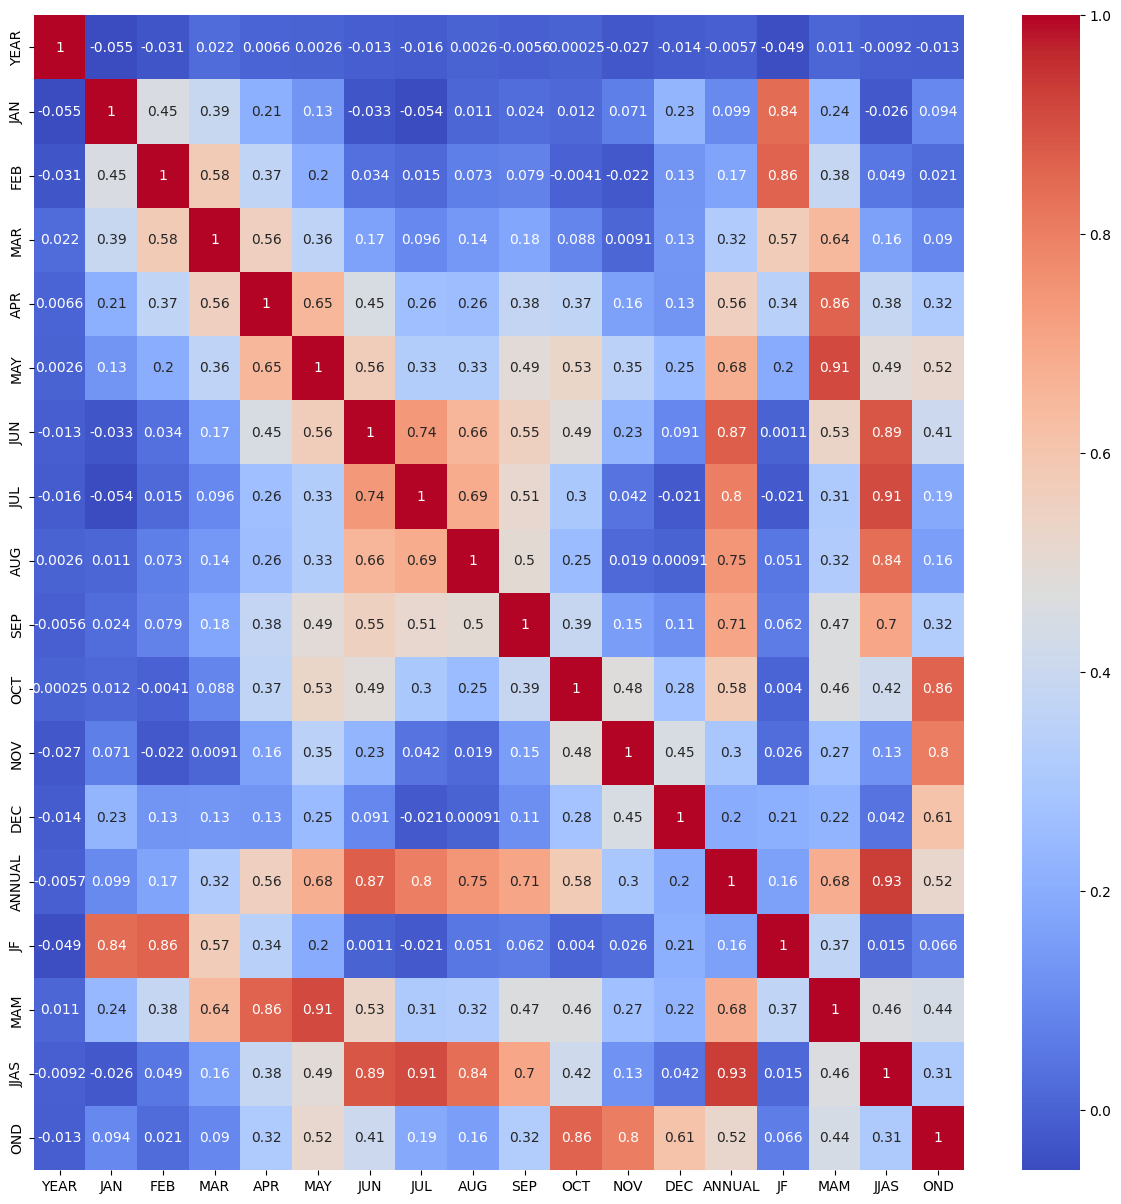

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [25]:
# creating the x and y for model
X = mean_df[['JUN','OCT','NOV','DEC','MAM']]
y = mean_df['OND']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# spliting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 53)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
model.score(X_test,y_test)

0.9706501019673464

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# eval;uating the performance of the model with handling the mssing values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f'Rmse: {rmse}')

Mean Squared Error: 704.0968603451106
R-squared: 0.9706501019673464
Rmse: 26.534823540870036


In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [33]:
imp_df = df.copy()

In [34]:
#handling the missing values with mice imputaion method
imputer = IterativeImputer(max_iter=10,random_state = 34)
imp_df = imputer.fit_transform(imp_df.select_dtypes(include=['float64','int64']))

In [35]:
imp_df

array([[1.9010e+03, 4.9200e+01, 8.7100e+01, ..., 5.6030e+02, 1.6963e+03,
        9.8030e+02],
       [1.9020e+03, 0.0000e+00, 1.5980e+02, ..., 4.5830e+02, 2.1859e+03,
        7.1670e+02],
       [1.9030e+03, 1.2700e+01, 1.4400e+02, ..., 2.3610e+02, 1.8740e+03,
        6.9060e+02],
       ...,
       [2.0150e+03, 2.2000e+00, 5.0000e-01, ..., 2.2390e+02, 8.6090e+02,
        5.5540e+02],
       [2.0160e+03, 5.9600e+01, 1.2100e+01, ..., 8.3200e+01, 7.4540e+02,
        1.6540e+02],
       [2.0170e+03, 2.1300e+01, 9.0000e-01, ..., 2.4780e+02, 1.1083e+03,
        3.6070e+02]])

In [36]:
# mice return series as the result so we have convert the series into dataframe back.
imputed_df = pd.DataFrame(imp_df,columns=df.columns[1:])

In [37]:
imputed_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1901.0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1902.0,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,1903.0,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,1904.0,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,1905.0,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [38]:
#checking the missing values
imputed_df.isna().sum()

,0
YEAR,0
JAN,0
FEB,0
MAR,0
APR,0
MAY,0
JUN,0
JUL,0
AUG,0
SEP,0


In [39]:
# finding mean and std for imp_data
new_std = []
new_mean = []
for i in num_data.columns:
  new_std.append(imputed_df[i].std())
  new_mean.append(imputed_df[i].mean())

In [40]:
for old,new in zip(num_std,new_std):
  print(f'std before handling NAN -->{old:.4f},std after handling NAN -->{new:.4f}')

std before handling NAN -->33.7931,std after handling NAN -->33.7868
std before handling NAN -->35.7317,std after handling NAN -->35.7342
std before handling NAN -->46.9280,std after handling NAN -->47.9540
std before handling NAN -->68.1510,std after handling NAN -->68.2042
std before handling NAN -->122.6951,std after handling NAN -->122.6963
std before handling NAN -->234.2921,std after handling NAN -->234.1525
std before handling NAN -->268.8507,std after handling NAN -->269.5944
std before handling NAN -->188.4261,std after handling NAN -->188.3364
std before handling NAN -->135.5476,std after handling NAN -->136.0422
std before handling NAN -->99.1949,std after handling NAN -->99.1180
std before handling NAN -->68.3587,std after handling NAN -->68.2704
std before handling NAN -->43.0538,std after handling NAN -->43.9925
std before handling NAN -->902.5994,std after handling NAN -->904.0597
std before handling NAN -->59.2939,std after handling NAN -->59.2514
std before handling NA

In [41]:
for old,new in zip(num_mean,new_mean):
  print(f'mean before handling NAN -->{old:.4f},mean after handling NAN -->{new:.4f}')

mean before handling NAN -->18.9383,mean after handling NAN -->18.9341
mean before handling NAN -->21.5994,mean after handling NAN -->21.5894
mean before handling NAN -->27.4129,mean after handling NAN -->27.1460
mean before handling NAN -->43.0718,mean after handling NAN -->43.0044
mean before handling NAN -->85.6609,mean after handling NAN -->85.7184
mean before handling NAN -->230.1175,mean after handling NAN -->230.1254
mean before handling NAN -->347.0200,mean after handling NAN -->346.8691
mean before handling NAN -->289.7422,mean after handling NAN -->289.7466
mean before handling NAN -->197.3163,mean after handling NAN -->197.1562
mean before handling NAN -->95.3247,mean after handling NAN -->95.3505
mean before handling NAN -->39.4964,mean after handling NAN -->39.4996
mean before handling NAN -->18.9686,mean after handling NAN -->18.8107
mean before handling NAN -->1409.4492,mean after handling NAN -->1413.9524
mean before handling NAN -->40.5230,mean after handling NAN -->40

as you can notice that mean and std were very much close after impuation.
now fit the data into model to see is it better than mean handling

In [42]:
X = imputed_df[['JUN','OCT','NOV','DEC','MAM']]
y = imputed_df['OND']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=20)

In [44]:
model  = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
model.score(X_test,y_test)

0.999999899954006

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f'root mean square error: ',rmse)
print(f"R-squared: {r2}")


Mean Squared Error: 0.0027435805532174053
root mean square error:  0.052379199623680824
R-squared: 0.999999899954006


final conclusion mice imputation yield as more score,r2 than mean so we can use mice imputaion for furter analysis or for other model development.

read more about this mini project in the read me....